# Analyze Missing Values and Outliers

In [4]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
### Load the data

In [6]:
df_listing = pd.read_csv('../../data/raw/kc_house_data.csv')
df_walking_score = pd.read_csv('../../data/raw/walking_score.csv')
df_income = pd.read_csv('../../data/raw/ZIP-3.csv')

### Dealing with missing values
How to deal with the missing values? Should we remove the rows or fill the gap with a value?

In [9]:
# Number of missing values by columns
print(df_listing.isnull().sum())
print('')
print(df_walking_score.isnull().sum())
print('')
print(df_income.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

zipcode           0
walking_score     0
transit_score    16
bike_score       45
dtype: int64

Zip       0
Median    0
Mean      7
Pop       0
dtype: int64


In [11]:
# select all the rows with missing values
df_walking_score[df_walking_score.isnull().any(axis=1)]

,zipcode,walking_score,transit_score,bike_score
0,98019,0,NaN,NaN
1,98045,0,NaN,NaN
2,98065,0,NaN,NaN
3,98022,0,NaN,NaN
4,98092,0,0.0,NaN
5,98027,0,0.0,NaN
6,98014,1,NaN,NaN
7,98038,2,NaN,NaN
8,98039,2,NaN,NaN
9,98029,2,24.0,NaN


In [13]:
# select all the rows with missing values
df_income[df_income.isnull().any(axis=1)]

,Zip,Median,Mean,Pop
7055,23909,"2,499",NaN,"2,027"
26131,76596,"57,014",NaN,"1,274"
26132,76597,"57,014",NaN,"2,882"
26133,76598,"57,014",NaN,523
26200,76798,"32,500",NaN,"1,862"
29644,90073,"2,499",NaN,539
29979,92135,"127,639",NaN,571


### Removing outliers
Linear Regression is very sensitive to outliers. Considering the number of bedrooms, should we remove houses with an extreme number of bedrooms? How many bedrooms are too many? (Suggestion: as a rule of thumb, three standard deviations from the mean is a good measure to identify outliers).

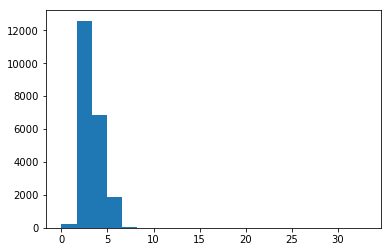

In [17]:
df_listing['bedrooms'].value_counts()
plt.hist(df_listing['bedrooms'], bins=20)
plt.show()